#Introducción

* Las exportaciones constituyen uno de los principales ingresos económicos para
Chile, impulsando el desarrollo y crecimiento económico del país. Chile es uno de
los principales exportadores mundiales en productos de minería, como cobre, litio,
yodo, así como en productos frutícolas, como uvas, arándanos, ciruelas,
manzanas y cerezas.

* Es importante realizar un estudio sobre las tendencias en la demanda de
productos que Chile exporta y conocer si existe algún tipo de estacionalidad en los datos.

* **Objetivo del trabajo:** Conocer las tendencias de los productos mineros en Chile desde el año 2017 a 2024

* Los datos que se utilizarán en este trabajo fueron obtenidos de la base de datos de exportaciones chilena: https://www.aduana.cl/base-de-datos-dinamicas-de-exportaciones/aduana/2020-11-19/151830.html


#Cargar las librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Cargar la información de exportaciones desde el año 2017 a 2024

In [ ]:
df_2017 = pd.read_excel('ExportacionesAño2017.xlsx')
df_2018 = pd.read_excel('ExportacionesRegionOrigenAño2018.xlsx')
df_2019 = pd.read_excel('ExportacionesAño2019.xlsx')
df_2020 = pd.read_excel('ExportacionesAño2020.xlsx')
df_2021 = pd.read_excel('ExportacionesAño2021.xlsx')
df_2022 = pd.read_excel('ExportacionesAño2022.xlsx')
df_2023 = pd.read_excel('ExportacionesAño2023.xlsx')
df_2024 = pd.read_excel('ExportacionesAño2024.xlsx')

##Análisis exploratario de los datos


##Previsualización de datos
Se utilizó el método head para mostrar los 5 primeros valores de cada dataframe
donde se encontró que existía una pequeña diferencia en el nombre de la columna MONTOFOB(US$)


In [ ]:
# df_2017.head()
# df_2018.head()
# df_2019.head()
# df_2020.head()
# df_2021.head()
# df_2022.head()
# df_2023.head()
df_2024.head()

,AÑO,MES,REGIONSALIDA,PAISDESTINO,VIATRANSPORTE,PUERTOEMBARQUE,ADUANA,SECTOR,CLASIFICACION,PRODUCTO,CODARANCELARIO,MONTOFOB (US$),PESOTONELADAS,TIPOOPERACION
0,2024,Enero,Antofagasta,Alemania,"Marítima, Fluvial y Lacustre",Antofagasta,Antofagasta,No minero,Resto No minería,Resto No minería,84195000,59199.85,1.300,200-EXPORTACIÓN NORMAL
1,2024,Enero,Antofagasta,Alemania,"Marítima, Fluvial y Lacustre",Antofagasta,Antofagasta,No minero,Resto No minería,Resto No minería,84314190,112558.22,6.400,200-EXPORTACIÓN NORMAL
2,2024,Enero,Antofagasta,Alemania,"Marítima, Fluvial y Lacustre",Puerto Angamos,Antofagasta,Minero,Minería,Cobre,74031100,10408750.34,1252.204,200-EXPORTACIÓN NORMAL
3,2024,Enero,Antofagasta,Alemania,"Marítima, Fluvial y Lacustre",Terminal Muelle Mecanizado Esperanza,Antofagasta,Minero,Minería,Minerales de cobre y sus concentrados,26030000,58849974.68,22508.100,200-EXPORTACIÓN NORMAL
4,2024,Enero,Antofagasta,Argentina,Carretero/Terrestre,Jama,Antofagasta,Minero,Minería,Litio,25309010,600.00,2.230,201-SALIDA DE MERCANCÍAS SIN CARÁCTER COMERCIAL


##Cambio de nombre en la columna MONTOFOB (Free on Board)

In [ ]:
df_2017.rename(columns = {'MONTOFOB':'MONTOFOB(US$)'}, inplace = True)
df_2019.rename(columns = {'MONTOFOB':'MONTOFOB(US$)'}, inplace = True)
df_2020.rename(columns = {'MONTOFOB':'MONTOFOB(US$)'}, inplace = True)
df_2021.rename(columns = {'MONTOFOB':'MONTOFOB(US$)'}, inplace = True)
df_2022.rename(columns = {'MONTOFOB':'MONTOFOB(US$)'}, inplace = True)
df_2023.rename(columns = {'MONTOFOB (US$)':'MONTOFOB(US$)'}, inplace = True)
df_2024.rename(columns = {'MONTOFOB (US$)':'MONTOFOB(US$)'}, inplace = True)


##Selección de las columnas que se utilizarán para el análisis

In [ ]:
df_2017 = df_2017[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]
df_2018 = df_2018[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]
df_2019 = df_2019[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]
df_2020 = df_2020[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]
df_2021 = df_2021[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]
df_2022 = df_2022[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]
df_2023 = df_2023[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]
df_2024 = df_2024[['AÑO','MES','PAISDESTINO','ADUANA','SECTOR', 'PRODUCTO', 'MONTOFOB(US$)','PESOTONELADAS']]

df_2017.columns

Index(['AÑO', 'MES', 'PAISDESTINO', 'ADUANA', 'SECTOR', 'PRODUCTO',
       'MONTOFOB(US$)', 'PESOTONELADAS'],
      dtype='object')

##Análisis previo de valores nulos del dataset
* La mayoría de valores nulos que son observados corresponden a la medición de Peso toneladas de un producto, se consideró no borrar los valores nulos debido a que es posible que las cargas tuvieran un peso muy inferior a la tonelada y por eso no se registró, además se consideró que se tiene la información del resto de columnas como el Monto de Free on board y el destino, lo que hace que esta información pueda ser valiosa para un análisis*

In [ ]:
# df_2017.isnull().sum()         #Contiene 3 valores nulos en columna Sector, 3 en producto, 3 en MontoFOB y 8 en Peso toneladas
# df_2018.isnull().sum()         #Contiene 119 valores nulos en pesotoneladas
# df_2019.isnull().sum()         #Contiene 276 valores nulos en Pesotoneladas
# df_2020.isnull().sum()         #Contiene 286 valores nulos en la columna Pesotoneladas
# df_2021.isnull().sum()         #Contiene 855 valores nulos en la columna Pesotoneladas
# df_2022.isnull().sum()         #Contiene 965 valores nulos en la columnas Pesotoneladas
# df_2023.isnull().sum()         #Contiene 1175 valores nulos en la columna Pesotoneladas
df_2024.isnull().sum()           #Contiene 367 valores nulos en la columna Pesotoneladas



AÑO                0
MES                0
PAISDESTINO        0
ADUANA             0
SECTOR             0
PRODUCTO           0
MONTOFOB(US$)      0
PESOTONELADAS    367
dtype: int64

##Concatenación de la información

Aquí se unió la información de los distintos conjuntos de datos en uno solo utilizando el método pd.concat y se reinició el índice para ver la totalidad de datos.


In [ ]:
df_exportaciones = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], axis = 0)
df_exportaciones.reset_index(drop = True, inplace = True)
print(df_exportaciones)

          AÑO    MES PAISDESTINO       ADUANA     SECTOR          PRODUCTO  \
0        2017  Enero    Alemania  Antofagasta     Minero             Litio   
1        2017  Enero    Alemania  Antofagasta     Minero             Litio   
2        2017  Enero    Alemania  Antofagasta  No minero  Resto no minería   
3        2017  Enero    Alemania  Antofagasta  No minero  Resto no minería   
4        2017  Enero    Alemania  Antofagasta  No minero  Resto no minería   
...       ...    ...         ...          ...        ...               ...   
1821800  2024  Abril      Zambia   Valparaíso  No minero  Resto No minería   
1821801  2024  Abril      Zambia   Valparaíso  No minero  Resto No minería   
1821802  2024  Abril      Zambia   Valparaíso  No minero  Resto No minería   
1821803  2024  Abril      Zambia   Valparaíso  No minero  Resto No minería   
1821804  2024  Abril      Zambia   Valparaíso  No minero  Resto No minería   

         MONTOFOB(US$)  PESOTONELADAS  
0           1247642.25 

In [ ]:
df_exportaciones[df_exportaciones['SECTOR'] == 'Minero'].groupby('PRODUCTO')['PRODUCTO'].count()

PRODUCTO
Cobre                                        10102
Litio                                         3976
Minerales de cinc y sus concentrados           185
Minerales de cobre y sus concentrados         3038
Minerales de hierro y sus concentrados         530
Minerales de molibdeno y sus concentrados     3380
Minerales de oro y sus concentrados            108
Minerales de plata y sus concentrados           13
Minerales de plomo y sus concentrados           21
Oro                                            602
Plata                                          581
Resto Minería                                 6962
Resto minería                                  497
Sal gema, sal de salinas y sal marina          784
Yodo                                          2506
Name: PRODUCTO, dtype: int64

##Filtrado de productos por sector de minería y productos mineros de interés

In [ ]:
df_exportaciones_prueba = df_exportaciones[df_exportaciones['SECTOR'] == 'Minero']
print(df_exportaciones_prueba)


          AÑO    MES       PAISDESTINO       ADUANA  SECTOR       PRODUCTO  \
0        2017  Enero          Alemania  Antofagasta  Minero          Litio   
1        2017  Enero          Alemania  Antofagasta  Minero          Litio   
18       2017  Enero           Bélgica  Antofagasta  Minero          Litio   
19       2017  Enero           Bélgica  Antofagasta  Minero          Litio   
20       2017  Enero           Bélgica  Antofagasta  Minero          Litio   
...       ...    ...               ...          ...     ...            ...   
1820933  2024  Abril  Taiwán (Formosa)  San Antonio  Minero          Cobre   
1820934  2024  Abril  Taiwán (Formosa)  San Antonio  Minero          Cobre   
1820983  2024  Abril  Taiwán (Formosa)  Antofagasta  Minero          Cobre   
1820984  2024  Abril  Taiwán (Formosa)  Antofagasta  Minero          Cobre   
1821124  2024  Abril           Uruguay    Los Andes  Minero  Resto Minería   

         MONTOFOB(US$)  PESOTONELADAS  
0           1247642.25 

In [ ]:
df_exportaciones_prueba.groupby('PRODUCTO')['PRODUCTO'].count()

PRODUCTO
Cobre                                        10102
Litio                                         3976
Minerales de cinc y sus concentrados           185
Minerales de cobre y sus concentrados         3038
Minerales de hierro y sus concentrados         530
Minerales de molibdeno y sus concentrados     3380
Minerales de oro y sus concentrados            108
Minerales de plata y sus concentrados           13
Minerales de plomo y sus concentrados           21
Oro                                            602
Plata                                          581
Resto Minería                                 6962
Resto minería                                  497
Sal gema, sal de salinas y sal marina          784
Yodo                                          2506
Name: PRODUCTO, dtype: int64

##Cambio de nombre de algunos productos

* Se cambió el nombre a productos que tenían derivados para dar uniformidad como el cobre, la plata, oro, etc.

* Se cambió el nombre a algunos productos que tenían distintos nombre en más de un conjunto de datos como Resto  minería y Resto Minería.


In [ ]:
df_exportaciones_prueba['PRODUCTO'] = df_exportaciones_prueba['PRODUCTO'].replace({'Minerales de cinc y sus concentrados':'Cinc',
                                                                                   'Minerales de cobre y sus concentrados':'Cobre',
                                                                                   'Minerales de hierro y sus concentrados':'Hierro',
                                                                                   'Minerales de molibdeno y sus concentrados':'Molibdeno',
                                                                                   'Minerales de oro y sus concentrados':'Oro',
                                                                                   'Minerales de plata y sus concentrados':'Plata',
                                                                                   'Minerales de plomo y sus concentrados':'Plomo',
                                                                                   'Resto minería': 'Resto Minería',
                                                                                   'Sal gema, sal de salinas y sal marina': 'Sales'})

<ipython-input-11-c03e03e281c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exportaciones_prueba['PRODUCTO'] = df_exportaciones_prueba['PRODUCTO'].replace({'Minerales de cinc y sus concentrados':'Cinc',


##**Total de peso toneladas de productos mineros exportados por año en Chile**

In [ ]:
pd.set_option('display.float_format', '{:,.0f}'.format)
peso_total_anual = df_exportaciones_prueba.groupby('AÑO')['PESOTONELADAS'].sum()
print(f"La cantidad total en peso toneladas por año de productos mineros exportados es de: \n \n {peso_total_anual}")

La cantidad total en peso toneladas por año de productos mineros exportados es de: 
 
 AÑO
2017   35,986,363
2018   39,244,452
2019   33,033,196
2020   37,614,525
2021   39,764,213
2022   38,161,313
2023   39,218,128
2024   13,291,844
Name: PESOTONELADAS, dtype: float64


##**Gráfico de torta de exportaciones por peso en toneladas**

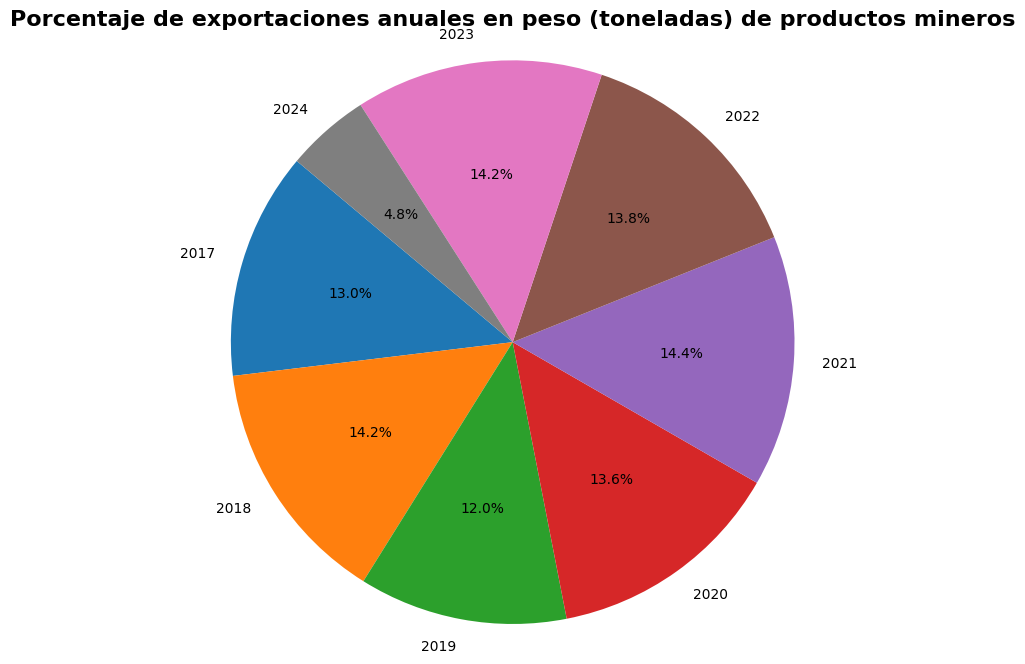

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(peso_total_anual, labels=peso_total_anual.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de exportaciones anuales en peso (toneladas) de productos mineros', fontsize = 16, fontweight = 'bold')
plt.axis('equal')
plt.show()

##**Total Monto Free on Board por año de productos mineros exportados en Chile**

In [ ]:
monto_total_anual = df_exportaciones_prueba.groupby('AÑO')['MONTOFOB(US$)'].sum()
print(f"El monto total free on board por año de productos mineros exportados es de: \n \n {monto_total_anual}")

El monto total free on board por año de productos mineros exportados es de: 
 
 AÑO
2017   36,706,839,231
2018   41,521,358,560
2019   37,274,992,309
2020   41,025,316,264
2021   58,825,629,018
2022   58,620,818,403
2023   55,904,144,900
2024   18,397,282,868
Name: MONTOFOB(US$), dtype: float64


##**Gráfico de torta**

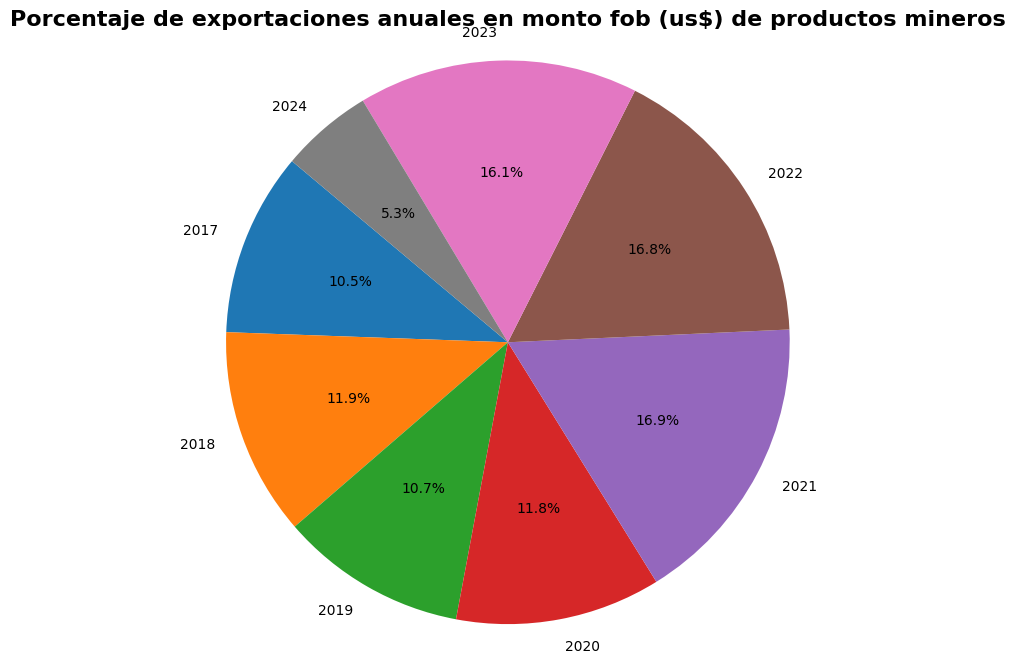

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(monto_total_anual, labels=monto_total_anual.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de exportaciones anuales en monto fob (us$) de productos mineros', fontweight = 'bold', fontsize = 16 )
plt.axis('equal')
plt.show()

##Gráficos de peso toneladas de productos mineros a través de los años

###**Cobre**

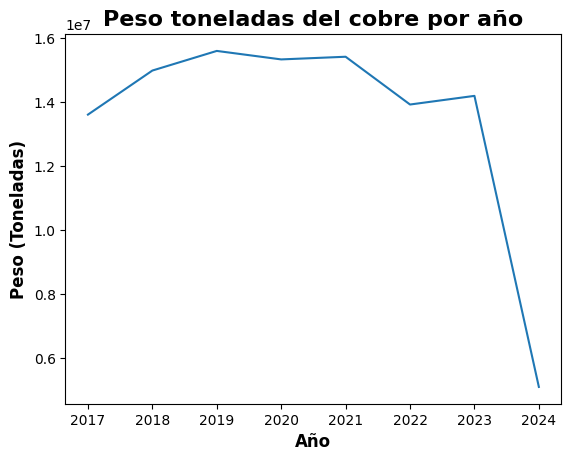

In [ ]:
df_cobre = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Cobre']
peso_total_anual_cobre = df_cobre.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_cobre, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas del cobre por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Hierro**

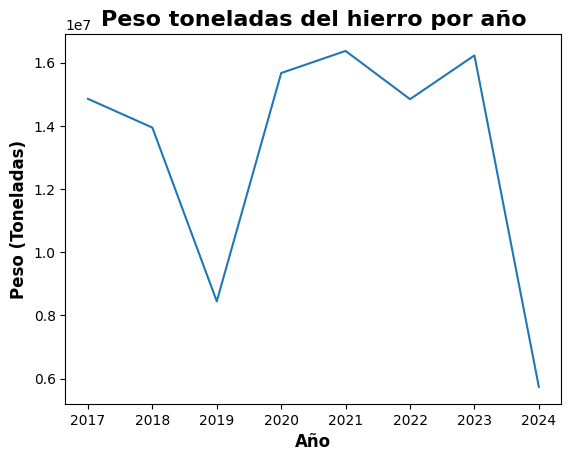

In [ ]:
df_hierro = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Hierro']
peso_total_anual_hierro = df_hierro.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_hierro, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas del hierro por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

##**Plata**

* De acuerdo al gráfico se puede visualizar que la mayor cantidad de exportaciones de la **plata** se produjo desde **2017** y fechas anteriores, hacia el **2018** presento una caída en sus exportaciones que se ha mantenido estable en el tiempo

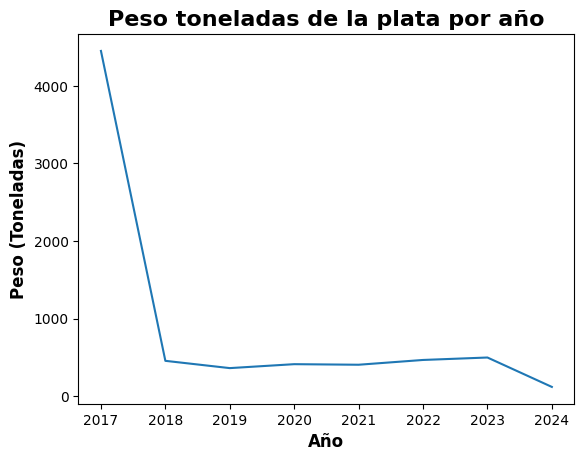

In [ ]:
df_plata = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Plata']
peso_total_anual_plata = df_plata.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_plata, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas de la plata por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Oro**

* De acuerdo a la información obtenida del gráfico el oro presentó una caída en sus exportaciones entre el año 2017 y 2018, pero posteriormente entre el año 2019 y 2020 volvieron aumentar llegando a su punto más alto entre 2022 y 2023

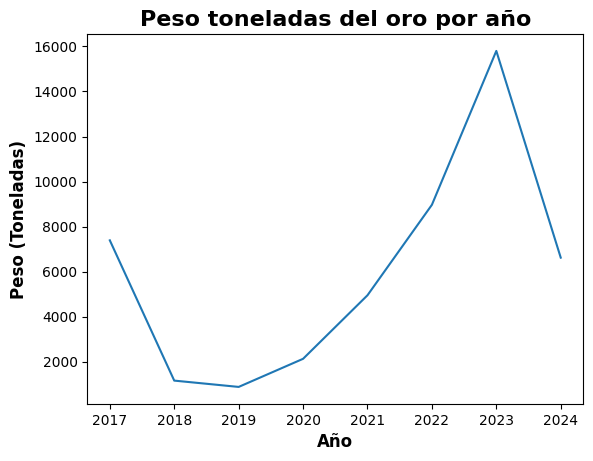

In [ ]:
df_oro= df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Oro']
peso_total_anual_oro = df_oro.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_oro, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas del oro por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Litio**

* De acuerdo a la información que se obtiene del gráfico, el litio ha tenido un crecimiento desde el año 2018, el cual se incrementó aún más desde el 2020 a la fecha, esto puede deberse a la alta demanda que tiene para la elaboración de baterías de litio a nivel mundial.

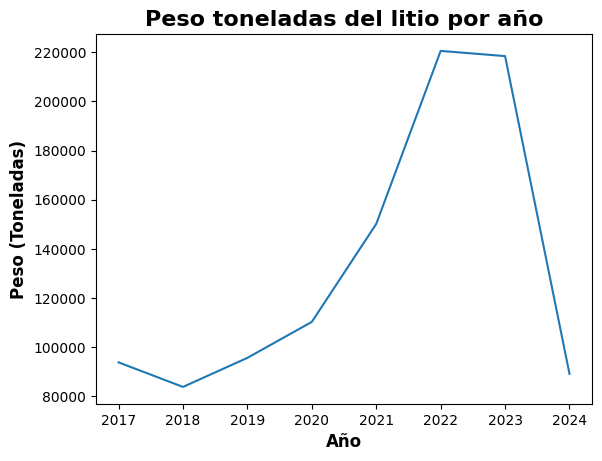

In [ ]:
df_litio = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Litio']
peso_total_anual_litio = df_litio.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_litio, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas del litio por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Molibdeno**

* De acuerdo a la información, el molibdeno presentó la mayor cantidad de exportaciones entre el año 2019 y el año 2020, luego entre el año 2021 y 2023 presentó una estabilidad en cuanto a la cantidad de exportaciones realizadas

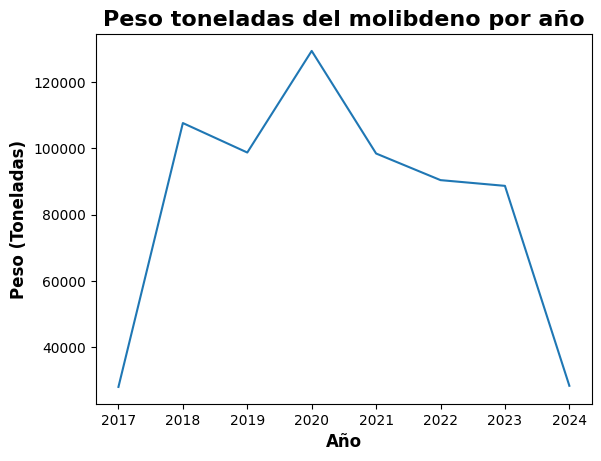

In [ ]:
df_molibdeno = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Molibdeno']
peso_total_anual_molibdeno = df_molibdeno.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_molibdeno, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas del molibdeno por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Cinc**

* De acuerdo a la información, el mineral de cinc y sus derivados es el que presenta la mayor inestabilidad en cuanto a cantidad de exportaciones realizadas, ya que durante el año 2018 presenta la mayor cantidad de exportaciones realizadas, pero al año siguiente presenta la menor cantidad de exportaciones, luego al año siguiente (2020) vuelve a subir la cantidad de exportaciones y luego vuelve a bajar

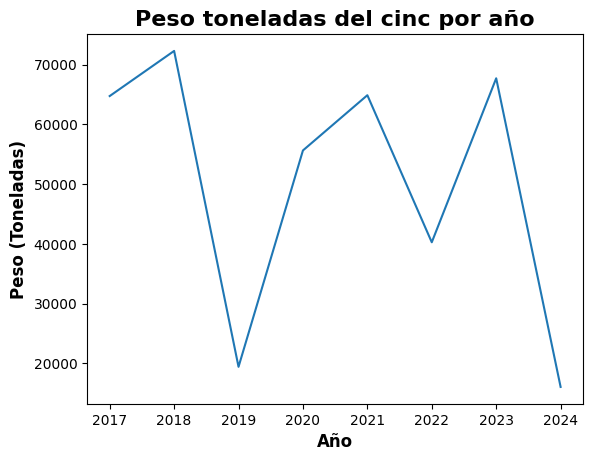

In [ ]:
df_cinc = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Cinc']
peso_total_anual_cinc = df_cinc.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_cinc, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas del cinc por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Restos de minería**

* Al igual que con otros productos mineros se evidencia que durante el año 2019 hubo una caída en las exportaciones de restos de minería en Chile.

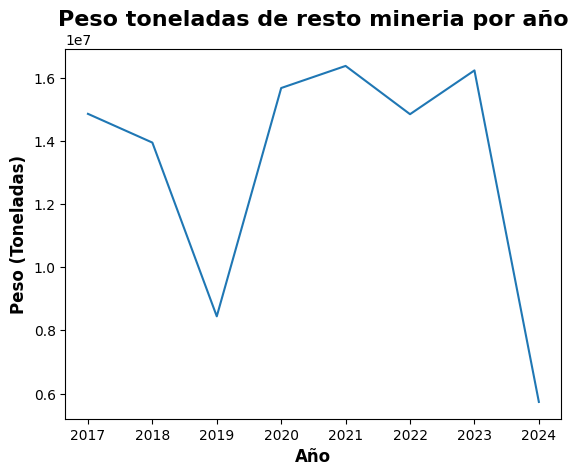

In [ ]:
df_resto_mineria = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Resto Minería']
peso_total_anual_resto_mineria = df_hierro.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_resto_mineria, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas de resto mineria por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Plomo**

* Presenta una caída en la cantidad de exportaciones realizadas desde el año 2017 hasta el año 2019 donde fue que se realizaron la menor cantidad de exportaciones.

* Presenta un alza en las exportaciones donde la mayor cantidad de exportaciones se realiza en el 2020.

* Vuelve a presentar una caída posterior al año 2021 sin volver a presentar un alza en las exportaciones de este producto minero.

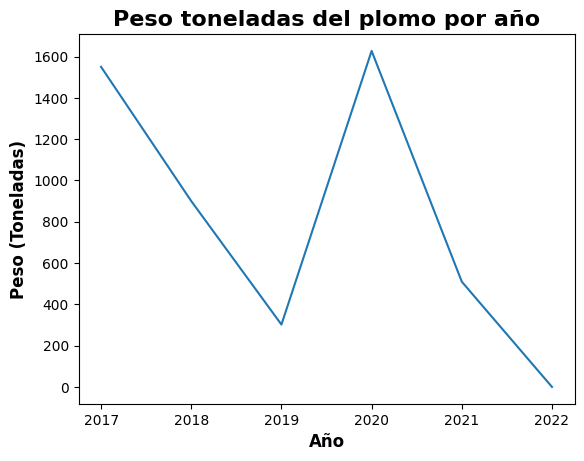

In [ ]:
df_plomo = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Plomo']
peso_total_anual_plomo = df_plomo.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_plomo, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas del plomo por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Sales**

* Es uno de los productos mineros que más se exporta, presenta un alza al comienzo desde el año 2017 a 2018 donde se presentó su mayor valor.

* Presenta una caída en las exportaciones durante el año 2020 donde se presenta su menor valor.

* Actualmente se encuentra estable ya que no se tiene suficiente información del año 2024 para sacar conclusiones.

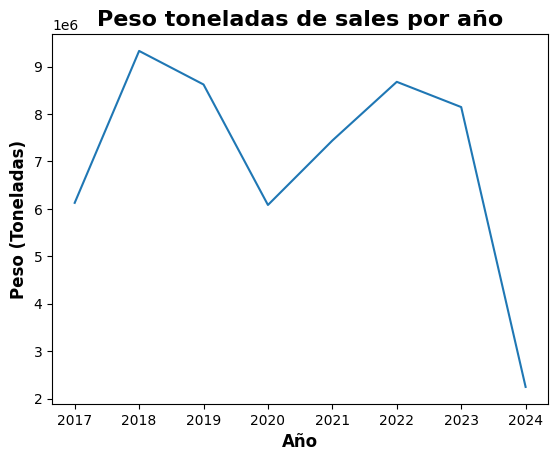

In [ ]:
df_sales = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Sales']
peso_total_anual_sales = df_sales.groupby('AÑO')['PESOTONELADAS'].sum().reset_index()
sns.lineplot(data = peso_total_anual_sales, x = 'AÑO', y = 'PESOTONELADAS')
plt.title('Peso toneladas de sales por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Peso (Toneladas)',fontsize = 12, fontweight = 'bold')
plt.show()

##**Gráficos del Monto Free on Board para cada producto a través de los años**

###**Cobre**

* La mayor cantidad de dinero relacionada con las exportaciones del cobre se presenta durante el año 2021.

* Se ve un alza en el monto Free on Board desde el año 2020 a 2021.

* Se observa una estabilidad desde el año 2022 a la fecha en cuanto al monto free on board.

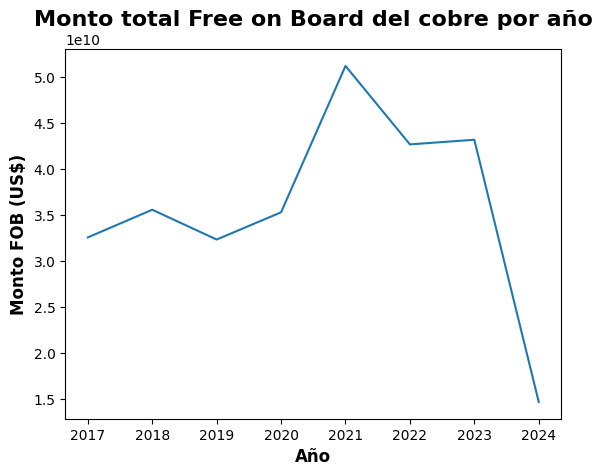

In [ ]:
df_cobre = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Cobre']
monto_total_anual_cobre = df_cobre.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_cobre, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board del cobre por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Hierro**

* Desde el año **2019** se presenta un gran incremento en la cantidad de exportaciones de **Hierro** realizadas en Chile.

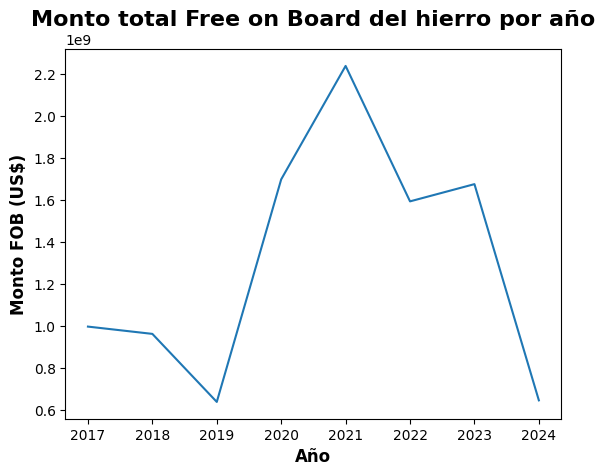

In [ ]:
df_hierro = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Hierro']
monto_total_anual_hierro = df_hierro.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_hierro, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board del hierro por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Plata**

* Desde el año **2019** se presenta un alza en el monto Free on board para la plata, donde su mayor valor se presenta en el año **2023**.

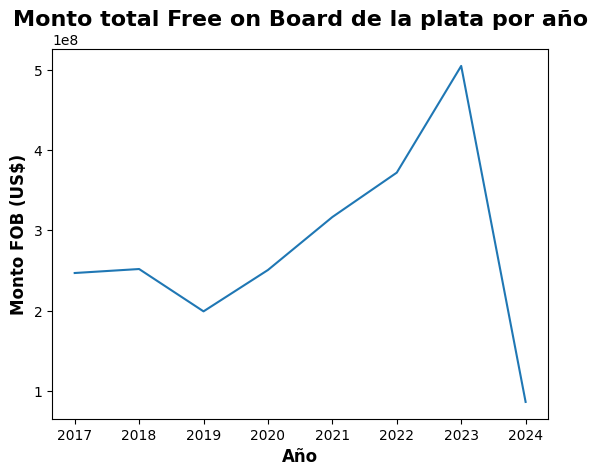

In [ ]:
df_plata = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Plata']
monto_total_anual_plata = df_plata.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_plata, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board de la plata por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Oro**

* El mayor valor monetario que ha tenido el oro se presenta durante el año **2017** y **2018** luego ha tenido una caída hasta el año **2020** donde se ha mantenido más estable con leves alzas y caídas hasta el año **2023**

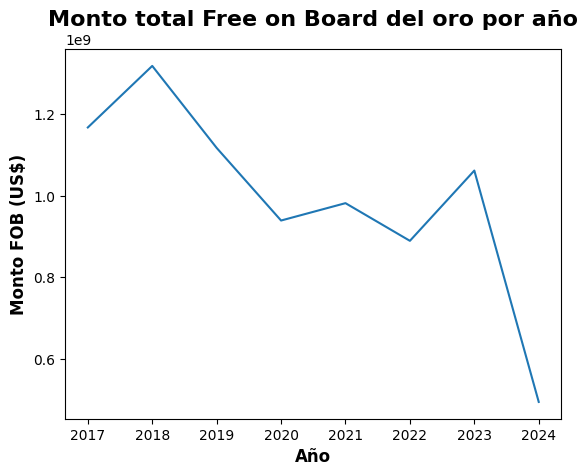

In [ ]:
df_oro = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Oro']
monto_total_anual_oro = df_oro.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_oro, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board del oro por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Litio**

* La cantidad del monto Free On Board para el litio ha crecido mucho desde el 2021, esto puede explicarse debido a que también ha incrementado desde esa fecha mucho la cantidad que Chile exporta de este mineral.

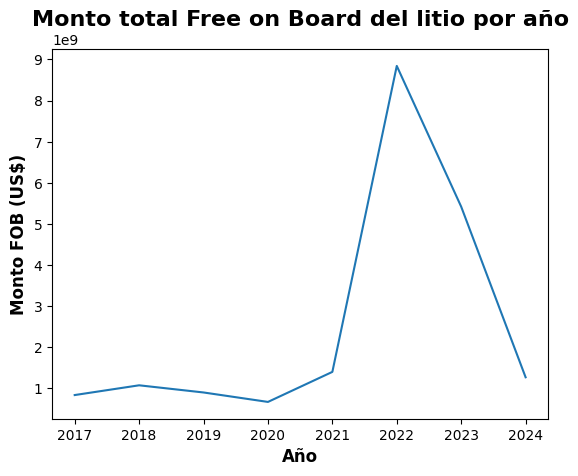

In [ ]:
df_litio = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Litio']
monto_total_anual_litio = df_litio.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_litio, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board del litio por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Molibdeno**

* Desde el año 2017 se presenta un incremento en la cantidad monetaria relacionada al molibdeno.

* Se estabilizó durante los periodos de 2018 a 2020 la cantidad monetaria relacionada al molibdeno.

* Presenta una nueva alza posterior al año 2020 y hasta el año 2023 donde presenta sus mayores valores del monto FOB hasta la fecha

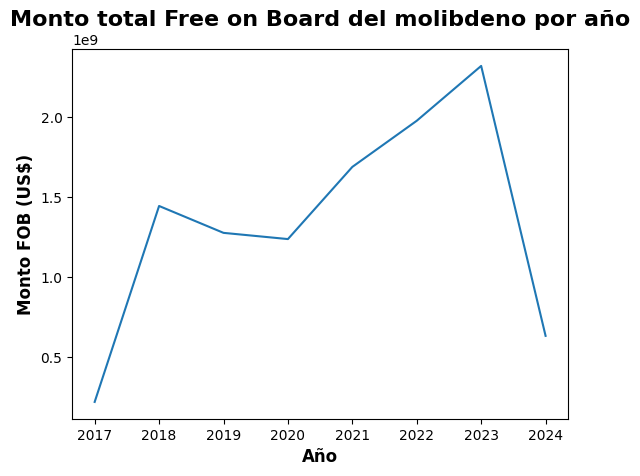

In [ ]:
df_molibdeno = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Molibdeno']
monto_total_anual_molibdeno = df_molibdeno.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_molibdeno, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board del molibdeno por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Cinc**

* Lo más destacable de la información obtenida del Cinc es que también en el año 2019 tuvo una caída grande en la cantidad de exportaciones que se realizaron ese año.

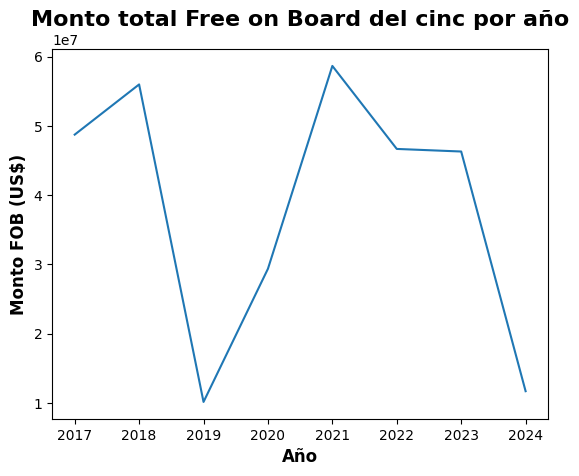

In [ ]:
df_cinc = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Cinc']
monto_total_anual_cinc = df_cinc.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_cinc, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board del cinc por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Restos de minería**

* La mayor cantidad de exportaciones se presenta entre el año 2021 y 2022

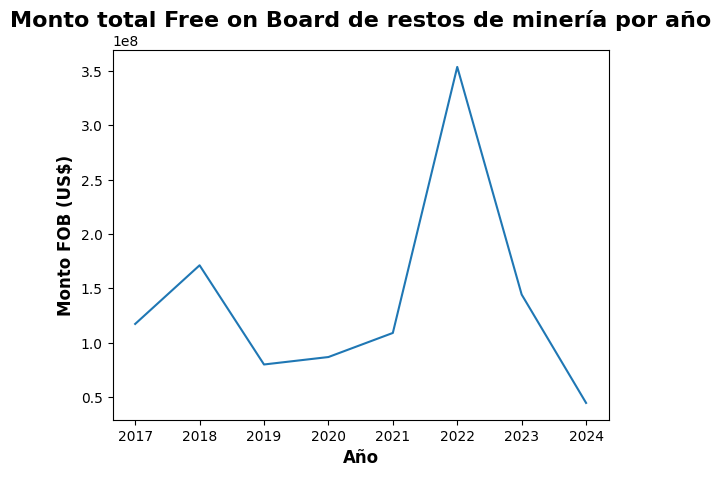

In [ ]:
df_restos_mineria = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Resto Minería']
monto_total_anual_restos_mineria = df_restos_mineria.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_restos_mineria, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board de restos de minería por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

###**Plomo**

* Presenta su nivel más bajo de exportaciones durante el año 2019.

* Su nivel más alto se encuentra durante el año 2020.

* Posterior al año 2020 tiene una gran caída en sus exportaciones

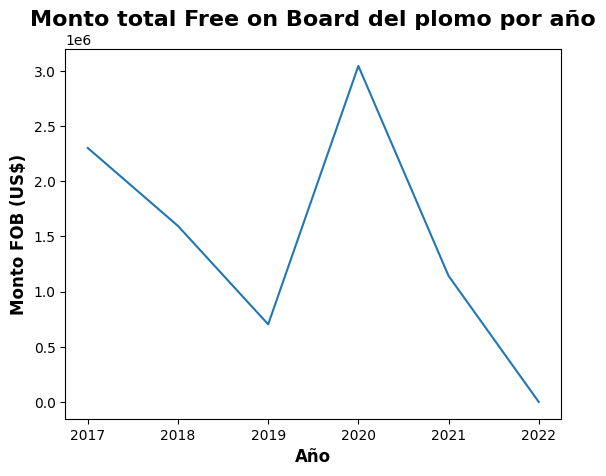

In [ ]:
df_plomo = df_exportaciones_prueba[df_exportaciones_prueba['PRODUCTO'] == 'Plomo']
monto_total_anual_plomo = df_plomo.groupby('AÑO')['MONTOFOB(US$)'].sum().reset_index()
sns.lineplot(data = monto_total_anual_plomo, x = 'AÑO', y = 'MONTOFOB(US$)')
plt.title('Monto total Free on Board del plomo por año', fontsize = 16, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12, fontweight = 'bold')
plt.ylabel('Monto FOB (US$)',fontsize = 12, fontweight = 'bold')
plt.show()

##**Resumen de la cantidad en peso toneladas de cada producto minero exportado desde el 2017 a 2024**

* El producto que más se ha exportado desde el 2017 a 2024 es el **cobre** con un total de **108.227.326 toneladas**.

* El segundo producto que más se ha exportado es el **Hierro** con un total de **106.099.063 toneladas**.

* Mientras que el producto que menos se ha exportado corresponde al **plomo** con un total de **4.889 toneladas** en estos años.



In [ ]:

df_exportaciones_toneladas = df_exportaciones_prueba.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad total en peso toneladas por año de cada producto minero es de: \n \n {df_exportaciones_toneladas}")

La cantidad total en peso toneladas por año de cada producto minero es de: 
 
 PRODUCTO
Cinc                400,979
Cobre           108,227,326
Hierro          106,099,063
Litio             1,062,030
Molibdeno           670,015
Oro                  47,874
Plata                 7,166
Plomo                 4,889
Resto Minería     2,978,140
Sales            56,666,798
Yodo                149,754
Name: PESOTONELADAS, dtype: float64


##**Gráficos de barras**

<ipython-input-33-5719e18d66e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_exportaciones_toneladas.sort_values(ascending = False).head(7), palette = 'dark')


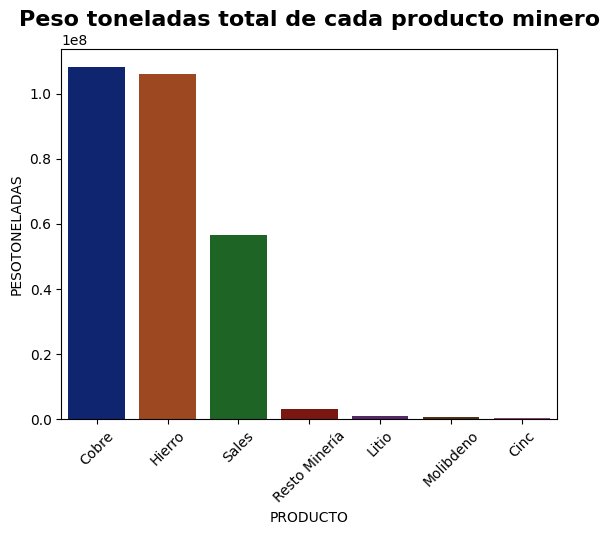

In [ ]:
sns.barplot(data = df_exportaciones_toneladas.sort_values(ascending = False).head(7), palette = 'dark')
plt.xticks(rotation = 45)
plt.title('Peso toneladas total de cada producto minero', fontweight = 'bold', fontsize = 16)
plt.show()

##**Resumen por año de la cantidad de cargas o exportaciones que se realizaron de cada producto minero exportado**

* El producto del cual se realizaron más cargas fue el cobre con 13140 cargas o exportaciones.

* El producto que se realizaron menos cargas durante estos años fue el plomo con solo 21.

In [ ]:
df_exportaciones_anual = df_exportaciones_prueba['PRODUCTO'].value_counts()
print(f"Este resumen representa la cantidad de exportaciones de cada producto minero \n \n {df_exportaciones_anual}")

Este resumen representa la cantidad de exportaciones de cada producto minero 
 
 PRODUCTO
Cobre            13140
Resto Minería     7459
Litio             3976
Molibdeno         3380
Yodo              2506
Sales              784
Oro                710
Plata              594
Hierro             530
Cinc               185
Plomo               21
Name: count, dtype: int64


##**Resumen por año de la cantidad de cargas en pesotoneladas**

###**Año 2017**

In [ ]:
df_exportaciones_2017 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2017]
df_exportaciones_peso_2017 = df_exportaciones_2017.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2017 son: \n \n {df_exportaciones_peso_2017}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2017 son: 
 
 PRODUCTO
Cinc                64,724
Cobre           13,617,065
Hierro          14,854,527
Litio               93,873
Molibdeno           28,058
Oro                  7,387
Plata                4,452
Plomo                1,550
Resto Minería    1,169,035
Sales            6,126,449
Yodo                19,241
Name: PESOTONELADAS, dtype: float64


###**Año 2018**

In [ ]:
df_exportaciones_2018 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2018]
df_exportaciones_peso_2018 = df_exportaciones_2018.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2018 son: \n \n {df_exportaciones_peso_2018}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2018 son: 
 
 PRODUCTO
Cinc                72,271
Cobre           14,993,991
Hierro          13,944,830
Litio               83,891
Molibdeno          107,674
Oro                  1,155
Plata                  455
Plomo                  900
Resto Minería      690,948
Sales            9,328,813
Yodo                19,524
Name: PESOTONELADAS, dtype: float64


###**Año 2019**

In [ ]:
df_exportaciones_2019 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2019]
df_exportaciones_peso_2019 = df_exportaciones_2019.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2019 son: \n \n {df_exportaciones_peso_2019}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2019 son: 
 
 PRODUCTO
Cinc                19,444
Cobre           15,607,482
Hierro           8,446,367
Litio               95,708
Molibdeno           98,782
Oro                    875
Plata                  361
Plomo                  302
Resto Minería      121,563
Sales            8,621,177
Yodo                21,135
Name: PESOTONELADAS, dtype: float64


###**Año 2020**

In [ ]:
df_exportaciones_2020 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2020]
df_exportaciones_peso_2020 = df_exportaciones_2020.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2020 son: \n \n {df_exportaciones_peso_2020}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2020 son: 
 
 PRODUCTO
Cinc                55,629
Cobre           15,342,097
Hierro          15,671,695
Litio              110,327
Molibdeno          129,438
Oro                  2,123
Plata                  412
Plomo                1,627
Resto Minería      199,075
Sales            6,081,494
Yodo                20,608
Name: PESOTONELADAS, dtype: float64


###**Año 2021**

In [ ]:
df_exportaciones_2021 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2021]
df_exportaciones_peso_2021 = df_exportaciones_2021.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2021 son: \n \n {df_exportaciones_peso_2021}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2021 son: 
 
 PRODUCTO
Cinc                64,865
Cobre           15,425,416
Hierro          16,371,171
Litio              150,157
Molibdeno           98,484
Oro                  4,947
Plata                  404
Plomo                  510
Resto Minería      189,465
Sales            7,439,889
Yodo                18,904
Name: PESOTONELADAS, dtype: float64


###**Año 2022**

In [ ]:
df_exportaciones_2022 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2022]
df_exportaciones_peso_2022 = df_exportaciones_2022.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2022 son: \n \n {df_exportaciones_peso_2022}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2022 son: 
 
 PRODUCTO
Cinc                40,270
Cobre           13,932,390
Hierro          14,843,400
Litio              220,489
Molibdeno           90,453
Oro                  8,966
Plata                  466
Plomo                    0
Resto Minería      325,659
Sales            8,677,283
Yodo                21,937
Name: PESOTONELADAS, dtype: float64


###**Año 2023**

In [ ]:
df_exportaciones_2023 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2023]
df_exportaciones_peso_2023 = df_exportaciones_2023.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2023 son: \n \n {df_exportaciones_peso_2023}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2023 son: 
 
 PRODUCTO
Cinc                67,694
Cobre           14,202,654
Hierro          16,229,244
Litio              218,382
Molibdeno           88,724
Oro                 15,803
Plata                  498
Resto Minería      228,853
Sales            8,145,257
Yodo                21,019
Name: PESOTONELADAS, dtype: float64


###**Año 2024**

In [ ]:
df_exportaciones_2024 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2024]
df_exportaciones_peso_2024 = df_exportaciones_2024.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2024 son: \n \n {df_exportaciones_peso_2024}")

La cantidad de exportaciones en peso toneladas de cada producto minero para el año 2024 son: 
 
 PRODUCTO
Cinc               16,081
Cobre           5,106,230
Hierro          5,737,829
Litio              89,203
Molibdeno          28,401
Oro                 6,619
Plata                 118
Resto Minería      53,541
Sales           2,246,435
Yodo                7,386
Name: PESOTONELADAS, dtype: float64


##**Resumen mensual peso toneladas**



###**Enero**

* Durante el mes de **Enero** lo que más se exporta es el **Hierro** ya que en promedio durante los últimos años se han exportado **193.169 toneladas** durante ese mes

In [ ]:
df_exportaciones_enero = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Enero']
df_exportaciones_peso_enero = df_exportaciones_enero.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas para el mes de enero : \n \n {df_exportaciones_peso_enero}")

Cantidad en peso toneladas para el mes de enero : 
 
 PRODUCTO
Cinc                15,799
Cobre           11,297,912
Hierro          10,431,116
Litio               96,491
Molibdeno           67,393
Oro                  5,079
Plata                  921
Plomo                  609
Resto Minería      166,878
Sales            5,818,210
Yodo                12,754
Name: PESOTONELADAS, dtype: float64


###**Febrero**

In [ ]:
df_exportaciones_febrero = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Febrero']
df_exportaciones_peso_febrero = df_exportaciones_febrero.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de febrero: \n \n {df_exportaciones_peso_febrero}")

Cantidad en peso toneladas promedio para el mes de febrero: 
 
 PRODUCTO
Cinc               30,089
Cobre           7,840,999
Hierro          5,715,751
Litio              94,514
Molibdeno          57,167
Oro                 7,424
Plata                 555
Plomo               1,010
Resto Minería     418,618
Sales           6,934,191
Yodo               12,962
Name: PESOTONELADAS, dtype: float64


###**Marzo**

In [ ]:
df_exportaciones_marzo = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Marzo']
df_exportaciones_peso_marzo = df_exportaciones_marzo.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de marzo: \n \n {df_exportaciones_peso_marzo}")

Cantidad en peso toneladas promedio para el mes de marzo: 
 
 PRODUCTO
Cinc               56,193
Cobre           9,463,167
Hierro          8,640,014
Litio              94,732
Molibdeno          61,262
Oro                 5,445
Plata               1,116
Resto Minería     258,759
Sales           5,496,721
Yodo               13,369
Name: PESOTONELADAS, dtype: float64


###**Abril**

In [ ]:
df_exportaciones_abril = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Abril']
df_exportaciones_peso_abril = df_exportaciones_abril.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de abril: \n \n {df_exportaciones_peso_abril}")

Cantidad en peso toneladas promedio para el mes de abril: 
 
 PRODUCTO
Cinc                32,960
Cobre            9,827,940
Hierro          10,317,129
Litio              123,704
Molibdeno           57,095
Oro                  2,808
Plata                  564
Plomo                  662
Resto Minería      271,057
Sales            3,906,972
Yodo                16,624
Name: PESOTONELADAS, dtype: float64


###**Mayo**

In [ ]:
df_exportaciones_mayo = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Mayo']
df_exportaciones_peso_mayo = df_exportaciones_mayo.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de mayo: \n \n {df_exportaciones_peso_mayo}")

Cantidad en peso toneladas promedio para el mes de mayo: 
 
 PRODUCTO
Cinc               30,530
Cobre           8,491,617
Hierro          7,862,501
Litio              92,212
Molibdeno          47,526
Oro                 3,253
Plata                 621
Plomo                 357
Resto Minería      72,465
Sales           3,620,536
Yodo               11,626
Name: PESOTONELADAS, dtype: float64


###**Junio**

In [ ]:
df_exportaciones_junio = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Junio']
df_exportaciones_peso_junio = df_exportaciones_junio.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de junio: \n \n {df_exportaciones_peso_junio}")

Cantidad en peso toneladas promedio para el mes de junio: 
 
 PRODUCTO
Cinc               24,833
Cobre           8,244,455
Hierro          8,635,980
Litio              78,818
Molibdeno          54,397
Oro                 2,321
Plata                 953
Plomo                 475
Resto Minería      84,287
Sales           3,564,769
Yodo               12,764
Name: PESOTONELADAS, dtype: float64


###**Julio**

In [ ]:
df_exportaciones_julio = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Julio']
df_exportaciones_peso_julio = df_exportaciones_julio.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de julio: \n \n {df_exportaciones_peso_julio}")

Cantidad en peso toneladas promedio para el mes de julio: 
 
 PRODUCTO
Cinc                21,566
Cobre            9,734,219
Hierro          10,460,615
Litio               79,060
Molibdeno           55,218
Oro                  3,131
Plata                  738
Plomo                    0
Resto Minería      186,536
Sales            2,606,196
Yodo                12,025
Name: PESOTONELADAS, dtype: float64


###**Agosto**

In [ ]:
df_exportaciones_agosto = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Agosto']
df_exportaciones_peso_agosto = df_exportaciones_agosto.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de agosto: \n \n {df_exportaciones_peso_agosto}")

Cantidad en peso toneladas promedio para el mes de agosto: 
 
 PRODUCTO
Cinc               40,615
Cobre           9,313,329
Hierro          8,045,939
Litio              81,706
Molibdeno          59,631
Oro                 3,909
Plata                 588
Plomo                 682
Resto Minería     417,607
Sales           4,398,832
Yodo               13,125
Name: PESOTONELADAS, dtype: float64


###**Septiembre**

In [ ]:
df_exportaciones_septiembre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Septiembre']
df_exportaciones_peso_septiembre = df_exportaciones_septiembre.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de septiembre: \n \n {df_exportaciones_peso_septiembre}")

Cantidad en peso toneladas promedio para el mes de septiembre: 
 
 PRODUCTO
Cinc               38,228
Cobre           7,476,049
Hierro          7,439,889
Litio              72,570
Molibdeno          46,557
Oro                 5,377
Plata                 270
Resto Minería     252,455
Sales           3,734,420
Yodo                9,910
Name: PESOTONELADAS, dtype: float64


###**Octubre**

In [ ]:
df_exportaciones_octubre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Octubre']
df_exportaciones_peso_octubre = df_exportaciones_octubre.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de octubre: \n \n {df_exportaciones_peso_octubre}")

Cantidad en peso toneladas promedio para el mes de octubre: 
 
 PRODUCTO
Cinc                27,538
Cobre            8,892,074
Hierro          10,063,542
Litio               87,511
Molibdeno           57,586
Oro                  2,914
Plata                  297
Plomo                1,003
Resto Minería      189,257
Sales            5,648,163
Yodo                12,959
Name: PESOTONELADAS, dtype: float64


###**Noviembre**

In [ ]:
df_exportaciones_noviembre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Noviembre']
df_exportaciones_peso_noviembre = df_exportaciones_noviembre.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de noviembre: \n \n {df_exportaciones_peso_noviembre}")

Cantidad en peso toneladas promedio para el mes de noviembre: 
 
 PRODUCTO
Cinc               49,627
Cobre           9,265,328
Hierro          8,549,256
Litio              82,720
Molibdeno          51,575
Oro                 2,785
Plata                 220
Plomo                  91
Resto Minería     333,524
Sales           4,814,493
Yodo               10,234
Name: PESOTONELADAS, dtype: float64


###**Diciembre**

In [ ]:
df_exportaciones_diciembre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Diciembre']
df_exportaciones_peso_diciembre = df_exportaciones_diciembre.groupby('PRODUCTO')['PESOTONELADAS'].sum()
print(f"Cantidad en peso toneladas promedio para el mes de diciembre: \n \n {df_exportaciones_peso_diciembre}")

Cantidad en peso toneladas promedio para el mes de diciembre: 
 
 PRODUCTO
Cinc               33,000
Cobre           8,380,238
Hierro          9,937,330
Litio              77,992
Molibdeno          54,608
Oro                 3,427
Plata                 323
Resto Minería     326,696
Sales           6,123,295
Yodo               11,402
Name: PESOTONELADAS, dtype: float64


##**Resumen de la cantidad en Monto Free on board de cada producto minero exportado desde el 2017 a 2024**

* El producto que representó una mayor cantidad de dinero desde el año 2017 a 2024 corresponde al **Cobre** con un total de **287.843.991.278** de **dolares** Monto Free on board.

* El que menos aportó fue el **Plomo**.


In [ ]:
df_exportaciones_monto = df_exportaciones_prueba.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad total en monto por año de cada producto minero es de: \n \n {df_exportaciones_monto}")

La cantidad total en monto por año de cada producto minero es de: 
 
 PRODUCTO
Cinc                307,452,695
Cobre           287,843,991,278
Hierro           10,457,853,084
Litio            20,418,394,152
Molibdeno        10,787,342,709
Oro               7,968,788,749
Plata             2,228,857,383
Plomo                 8,787,270
Resto Minería     1,106,905,731
Sales             1,092,114,980
Yodo              6,055,893,523
Name: MONTOFOB(US$), dtype: float64


##**Resumen por año del Monto Free on board de cada producto minero**

###**Año 2017**

In [ ]:
df_exportaciones_2017 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2017]
df_exportaciones_monto_2017 = df_exportaciones_2017.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2017 es: \n \n {df_exportaciones_monto_2017}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2017 es: 
 
 PRODUCTO
Cinc                48,730,432
Cobre           32,603,469,284
Hierro             998,545,435
Litio              837,775,255
Molibdeno          216,881,442
Oro              1,167,424,902
Plata              246,925,153
Plomo                2,300,939
Resto Minería      117,243,271
Sales              125,343,659
Yodo               342,199,459
Name: MONTOFOB(US$), dtype: float64


###**Año 2018**

In [ ]:
df_exportaciones_2018 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2018]
df_exportaciones_monto_2018 = df_exportaciones_2018.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2018 es: \n \n {df_exportaciones_monto_2018}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2018 es: 
 
 PRODUCTO
Cinc                55,980,467
Cobre           35,615,316,692
Hierro             963,876,183
Litio            1,074,977,172
Molibdeno        1,443,467,851
Oro              1,318,455,290
Plata              251,899,776
Plomo                1,594,679
Resto Minería      171,244,634
Sales              185,685,409
Yodo               438,860,407
Name: MONTOFOB(US$), dtype: float64


###**Año 2019**

In [ ]:
df_exportaciones_2019 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2019]
df_exportaciones_monto_2019 = df_exportaciones_2019.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2019 es: \n \n {df_exportaciones_monto_2019}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2019 es: 
 
 PRODUCTO
Cinc                10,115,597
Cobre           32,373,123,949
Hierro             640,311,818
Litio              900,641,092
Molibdeno        1,275,183,799
Oro              1,117,290,082
Plata              199,099,653
Plomo                  703,572
Resto Minería       79,919,378
Sales              136,179,668
Yodo               542,423,701
Name: MONTOFOB(US$), dtype: float64


###**Año 2020**

In [ ]:
df_exportaciones_2020 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2020]
df_exportaciones_monto_2020 = df_exportaciones_2020.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2020 es: \n \n {df_exportaciones_monto_2020}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2020 es: 
 
 PRODUCTO
Cinc                29,351,864
Cobre           35,334,871,477
Hierro           1,698,831,949
Litio              670,743,842
Molibdeno        1,236,273,236
Oro                939,075,715
Plata              250,694,541
Plomo                3,044,382
Resto Minería       86,782,483
Sales              114,141,459
Yodo               661,505,314
Name: MONTOFOB(US$), dtype: float64


###**Año 2021**

In [ ]:
df_exportaciones_2021 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2021]
df_exportaciones_monto_2021 = df_exportaciones_2021.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2021 es: \n \n {df_exportaciones_monto_2021}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2021 es: 
 
 PRODUCTO
Cinc                58,654,978
Cobre           51,257,037,226
Hierro           2,238,304,101
Litio            1,401,383,355
Molibdeno        1,688,027,039
Oro                981,692,934
Plata              316,747,051
Plomo                1,142,798
Resto Minería      108,958,968
Sales              135,403,238
Yodo               638,277,330
Name: MONTOFOB(US$), dtype: float64


###**Año 2022**

In [ ]:
df_exportaciones_2022 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2022]
df_exportaciones_monto_2022 = df_exportaciones_2022.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2022 es: \n \n {df_exportaciones_monto_2022}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2022 es: 
 
 PRODUCTO
Cinc                46,663,579
Cobre           42,721,617,661
Hierro           1,594,129,842
Litio            8,843,271,708
Molibdeno        1,976,892,828
Oro                889,243,736
Plata              372,131,507
Plomo                      900
Resto Minería      353,900,365
Sales              170,919,594
Yodo             1,652,046,684
Name: MONTOFOB(US$), dtype: float64


###**Año 2023**

In [ ]:
df_exportaciones_2023 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2023]
df_exportaciones_monto_2023 = df_exportaciones_2023.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2023 es: \n \n {df_exportaciones_monto_2023}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2023 es: 
 
 PRODUCTO
Cinc                46,290,103
Cobre           43,227,395,144
Hierro           1,676,078,913
Litio            5,419,161,222
Molibdeno        2,320,181,416
Oro              1,061,662,582
Plata              505,207,759
Resto Minería      144,327,001
Sales              172,953,537
Yodo             1,330,887,222
Name: MONTOFOB(US$), dtype: float64


###**Año 2024**

In [ ]:
df_exportaciones_2024 = df_exportaciones_prueba[df_exportaciones_prueba['AÑO'] == 2024]
df_exportaciones_monto_2024 = df_exportaciones_2024.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2024 es: \n \n {df_exportaciones_monto_2024}")

La cantidad de Monto Free on Board  de cada producto minero en dolares para el año 2024 es: 
 
 PRODUCTO
Cinc                11,665,675
Cobre           14,711,159,845
Hierro             647,774,843
Litio            1,270,440,506
Molibdeno          630,435,097
Oro                493,943,509
Plata               86,151,943
Resto Minería       44,529,630
Sales               51,488,416
Yodo               449,693,405
Name: MONTOFOB(US$), dtype: float64


##**Resumen mensual por Monto Free on Board en dolares de cada producto minero**

###**Enero**

In [ ]:
df_exportaciones_enero = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Enero']
df_exportaciones_monto_enero = df_exportaciones_enero.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de enero : \n \n {df_exportaciones_monto_enero}")

Monto Free on Board en dolares para el mes de enero : 
 
 PRODUCTO
Cinc                13,704,436
Cobre           29,881,164,602
Hierro           1,050,806,276
Litio            1,615,148,773
Molibdeno        1,102,160,644
Oro                727,401,135
Plata              237,741,589
Plomo                1,174,820
Resto Minería       60,738,097
Sales              103,619,954
Yodo               462,846,083
Name: MONTOFOB(US$), dtype: float64


###**Febrero**

In [ ]:
df_exportaciones_febrero = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Febrero']
df_exportaciones_monto_febrero = df_exportaciones_febrero.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de febrero : \n \n {df_exportaciones_monto_febrero}")

Monto Free on Board en dolares para el mes de febrero : 
 
 PRODUCTO
Cinc                25,203,459
Cobre           21,658,123,418
Hierro             568,035,391
Litio            1,562,289,094
Molibdeno          963,613,312
Oro                649,845,174
Plata              159,512,361
Plomo                1,582,200
Resto Minería       65,890,301
Sales              130,326,926
Yodo               907,262,337
Name: MONTOFOB(US$), dtype: float64


###**Marzo**

In [ ]:
df_exportaciones_marzo = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Marzo']
df_exportaciones_monto_marzo = df_exportaciones_marzo.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de marzo : \n \n {df_exportaciones_monto_marzo}")

Monto Free on Board en dolares para el mes de marzo : 
 
 PRODUCTO
Cinc                38,903,418
Cobre           25,916,033,190
Hierro             963,876,032
Litio            1,784,989,545
Molibdeno          991,503,610
Oro                641,890,699
Plata              202,520,161
Resto Minería       70,347,070
Sales              100,378,779
Yodo               530,169,879
Name: MONTOFOB(US$), dtype: float64


###**Abril**

In [ ]:
df_exportaciones_abril = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Abril']
df_exportaciones_monto_abril = df_exportaciones_abril.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de abril : \n \n {df_exportaciones_monto_abril}")

Monto Free on Board en dolares para el mes de abril : 
 
 PRODUCTO
Cinc                34,974,249
Cobre           26,724,893,640
Hierro           1,106,404,806
Litio            2,175,424,952
Molibdeno          968,196,583
Oro                653,377,843
Plata              156,530,083
Plomo                1,355,346
Resto Minería       73,762,087
Sales               86,253,863
Yodo               622,099,655
Name: MONTOFOB(US$), dtype: float64


###**Mayo**

In [ ]:
df_exportaciones_mayo = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Mayo']
df_exportaciones_monto_mayo = df_exportaciones_mayo.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de mayo : \n \n {df_exportaciones_monto_mayo}")

Monto Free on Board en dolares para el mes de mayo : 
 
 PRODUCTO
Cinc                24,494,004
Cobre           22,319,798,164
Hierro             786,037,934
Litio            2,478,683,585
Molibdeno          756,465,518
Oro                679,947,272
Plata              225,922,312
Plomo                  388,508
Resto Minería       54,821,207
Sales               78,631,616
Yodo               403,550,139
Name: MONTOFOB(US$), dtype: float64


###**Junio**

In [ ]:
df_exportaciones_junio = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Junio']
df_exportaciones_monto_junio = df_exportaciones_junio.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de junio : \n \n {df_exportaciones_monto_junio}")

Monto Free on Board en dolares para el mes de junio : 
 
 PRODUCTO
Cinc                14,862,745
Cobre           21,286,800,042
Hierro             864,718,513
Litio            1,498,068,002
Molibdeno          862,876,515
Oro                629,310,485
Plata              178,014,403
Plomo                  850,066
Resto Minería       48,283,720
Sales               74,087,071
Yodo               480,267,824
Name: MONTOFOB(US$), dtype: float64


###**Julio**

In [ ]:
df_exportaciones_julio = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Julio']
df_exportaciones_monto_julio = df_exportaciones_enero.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de julio : \n \n {df_exportaciones_monto_julio}")

Monto Free on Board en dolares para el mes de julio : 
 
 PRODUCTO
Cinc                13,704,436
Cobre           29,881,164,602
Hierro           1,050,806,276
Litio            1,615,148,773
Molibdeno        1,102,160,644
Oro                727,401,135
Plata              237,741,589
Plomo                1,174,820
Resto Minería       60,738,097
Sales              103,619,954
Yodo               462,846,083
Name: MONTOFOB(US$), dtype: float64


###**Agosto**

In [ ]:
df_exportaciones_agosto = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Agosto']
df_exportaciones_monto_agosto = df_exportaciones_agosto.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de agosto : \n \n {df_exportaciones_monto_agosto}")

Monto Free on Board en dolares para el mes de agosto : 
 
 PRODUCTO
Cinc                29,842,907
Cobre           23,626,928,656
Hierro             709,305,499
Litio            1,589,170,728
Molibdeno          922,881,030
Oro                656,862,106
Plata              182,254,798
Plomo                1,357,448
Resto Minería      126,013,568
Sales               91,424,514
Yodo               516,764,166
Name: MONTOFOB(US$), dtype: float64


###**Septiembre**

In [ ]:
df_exportaciones_septiembre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Septiembre']
df_exportaciones_monto_septiembre = df_exportaciones_septiembre.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de septiembre : \n \n {df_exportaciones_monto_septiembre}")

Monto Free on Board en dolares para el mes de septiembre : 
 
 PRODUCTO
Cinc                30,116,210
Cobre           20,292,388,070
Hierro             663,527,808
Litio            1,334,288,190
Molibdeno          748,711,553
Oro                581,128,737
Plata              187,009,865
Resto Minería      177,726,129
Sales               74,253,976
Yodo               366,365,145
Name: MONTOFOB(US$), dtype: float64


###**Octubre**

In [ ]:
df_exportaciones_octubre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Octubre']
df_exportaciones_monto_octubre = df_exportaciones_octubre.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de octubre : \n \n {df_exportaciones_monto_octubre}")

Monto Free on Board en dolares para el mes de octubre : 
 
 PRODUCTO
Cinc                18,961,556
Cobre           23,358,782,873
Hierro             880,237,404
Litio            1,640,420,864
Molibdeno          863,408,010
Oro                756,627,963
Plata              215,225,822
Plomo                1,852,188
Resto Minería      187,361,132
Sales              106,425,819
Yodo               508,723,082
Name: MONTOFOB(US$), dtype: float64


###**Noviembre**

In [ ]:
df_exportaciones_noviembre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Noviembre']
df_exportaciones_monto_noviembre = df_exportaciones_noviembre.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de noviembre : \n \n {df_exportaciones_monto_noviembre}")

Monto Free on Board en dolares para el mes de noviembre : 
 
 PRODUCTO
Cinc                41,790,702
Cobre           24,821,756,028
Hierro             833,972,647
Litio            1,608,554,871
Molibdeno          858,539,337
Oro                691,082,008
Plata              150,788,130
Plomo                  226,594
Resto Minería       76,177,249
Sales               85,474,172
Yodo               397,735,561
Name: MONTOFOB(US$), dtype: float64


###**Diciembre**

In [ ]:
df_exportaciones_diciembre = df_exportaciones_prueba[df_exportaciones_prueba['MES'] == 'Diciembre']
df_exportaciones_monto_diciembre = df_exportaciones_diciembre.groupby('PRODUCTO')['MONTOFOB(US$)'].sum()
print(f"Monto Free on Board en dolares para el mes de diciembre : \n \n {df_exportaciones_monto_diciembre}")

Monto Free on Board en dolares para el mes de diciembre : 
 
 PRODUCTO
Cinc                23,581,053
Cobre           23,997,912,455
Hierro           1,015,033,185
Litio            1,520,104,171
Molibdeno          875,486,199
Oro                694,996,011
Plata              180,974,016
Resto Minería       83,400,984
Sales              107,617,248
Yodo               443,375,275
Name: MONTOFOB(US$), dtype: float64


#Conclusiones

* El producto minero que más exporta Chile sigue siendo el Litio en cuanto a peso en toneladas, también es el que más ingresos le genera.

* Durante el año 2021 se presentó un gran alza en las exportaciones en especial del cobre, esto se debe a los tratados de libre comercio: https://www.subrei.gob.cl/sala-de-prensa/noticias/detalle-noticias/2022/01/07/comercio-exterior-de-chile-crece-41-en-2021-impulsado-por-env%C3%ADos-no-cobre-y-servicios

* También se destaca el gran crecimiento que ha tenido el Litio los últimos años en las exportaciones chilenas tanto en cantidad como en dinero generado por exportaciones, esto se debe a la gran demanda que existe en el mundo por este mineral y siendo Chile el segundo exportador más grande de este mineral, el cual es muy usado para la fabricación de baterías.

* Otro aspecto destacable es que varios productos mineros durante el año 2019 tuvieron una gran caída en sus exportaciones como el plomo, cinc y hierro. Esto se debe a los conflictos comerciales entre otros países: https://www.subrei.gob.cl/docs/default-source/estudios-y-documentos/reporte-trimestral/comercio-exterior-de-chile-anual-2019.pdf?sfvrsn=1eb0bb58_0

* El hierro es uno de los minerales que más se ha exportado durante los últimos años en Chile, solo por detrás del cobre, aunque no genera tantas ganancias. La causa de que se exporte cada vez más es debido a que Chile es uno de los cuatro países que más Hierro tienen y durante los últimos años, China tiene una gran demanda de este mineral para industrias como la automovilística y tecnológica: https://www.cnnchile.com/m360/versatilidad-resistencia-mineria-hierro-chile_20211127/#:~:text=el%20futuro%20minero-,La%20exportaci%C3%B3n%20de%20este%20metal%20aument%C3%B3%20durante%20los%20%C3%BAltimos%20dos,de%20la%20demanda%20mundial%20total.